In [2]:
from chxanalys.chx_packages import *
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})
import pandas as pds
#%reset -f  #for clean up things in the memory

In [3]:
from chxanalys.chx_libs import markers, colors

from chxanalys.chx_generic_functions import stretched_auto_corr_scat_factor

from shutil import copyfile

T = True
F = False

# Define Result Path here

In [4]:
data_dir0 = '/XF11ID/analysis/2017_1/yuzhang/Results/'
data_dir0 = '/XF11ID/analysis/2017_1/commissioning/Results/'
data_dir0 = '/XF11ID/analysis/CHX_Results_Pipelines/Beamline_Paper/Results/'

In [5]:

#data_dir = os.path.join(data_dir0, 'Beamline_Paper/')
#os.makedirs(data_dir, exist_ok=True)

data_dir = data_dir0

# Build a uid dictionary here

In [40]:
 suid_dict = {'Silica_250nm_500K' : '701d0d',
              'Silica_250nm_4M' :  'cb99bd',
              
             }
    
    

In [6]:
 suid_dict = {'Au_A5' : 'c8a1fb1f',              
              
             }

In [7]:
scat_geometry ='saxs'

In [8]:
uid_dict = {}
for u in list( suid_dict.keys() ):
    uid_dict[u] =  get_meta_data( suid_dict[u] )['uid']
print( uid_dict )

{'Au_A5': 'c8a1fb1f-1960-49f8-927a-c29fca8aaafa'}


# Extract result here

In [9]:
total_res = {}

In [31]:
%run /home/yuzhang/chxanalys_link/chxanalys/Create_Report.py

In [94]:
for u in list( uid_dict.keys() ):
    print(suid_dict[u])
    try:        
        inDir =  data_dir0 + suid_dict[u] + '/'
        print( inDir)
        total_res[u] = extract_xpcs_results_from_h5( filename = 'uid=%s_Res.h5'%uid_dict[u], 
                                import_dir = inDir)#,exclude_keys= ['g12b'] )

    except:
        inDir =  data_dir0 + uid_dict[u] + '/'
        total_res[u] = extract_xpcs_results_from_h5( filename = 'uid=%s_Res.h5'%uid_dict[u], 
                                                    import_dir = inDir )

c8a1fb1f
/XF11ID/analysis/CHX_Results_Pipelines/Beamline_Paper/Results/c8a1fb1f/


In [95]:
print( total_res[list( uid_dict.keys() )[0]].keys()  )

dict_keys(['avg_img', 'g2', 'mean_int_sets', 'g2_fit_paras', 'times_roi', 'bad_frame_list', 'taus', 'mask', 'imgsum', 'qval_dict_p', 'iqst', 'md', 'qval_dict_v', 'qval_dict', 'roi_mask', 'pixel_mask', 'g2b_fit_paras', 'g2b', 'q_saxs', 'qt', 'g12b', 'iq_saxs', 'tausb', 'wat'])


In [46]:
uid_dict

{'Au_A5': 'c8a1fb1f-1960-49f8-927a-c29fca8aaafa'}

# Give uid key

In [47]:
k = list(uid_dict.keys())[0]
uid_= 'uid=%s'%uid_dict[k][:6]
print(k, uid_)

Au_A5 uid=c8a1fb


# Load metadata

In [49]:
total_res[k]['md']['metadata_file']

'/XF11ID/analysis/CHX_Results_Pipelines/Beamline_Paper/Results/c8a1fb1f/uid=c8a1fb1f_md.pkl'

In [50]:
md = pload_obj( total_res[k]['md']['metadata_file'] )

In [70]:
uidstr = 'uid=%s'%md['suid']
setup_pargs = md['setup_pargs']
timeperframe = setup_pargs['timeperframe']

In [68]:
setup_pargs

{'Ldet': 16075.600000000002,
 'center': [1041, 1085],
 'dpix': 0.075000003562308848,
 'exposuretime': 0.0013299999991431832,
 'lambda_': 1.2849435,
 'path': '/XF11ID/analysis/CHX_Results_Pipelines/Beamline_Paper/Results/c8a1fb1f/',
 'timeperframe': 0.00134,
 'uid': 'uid=c8a1fb1f'}

# Do Plots

## Plot avg_img

In [48]:
avg_img = total_res[k]['avg_img']

<IPython.core.display.Javascript object>


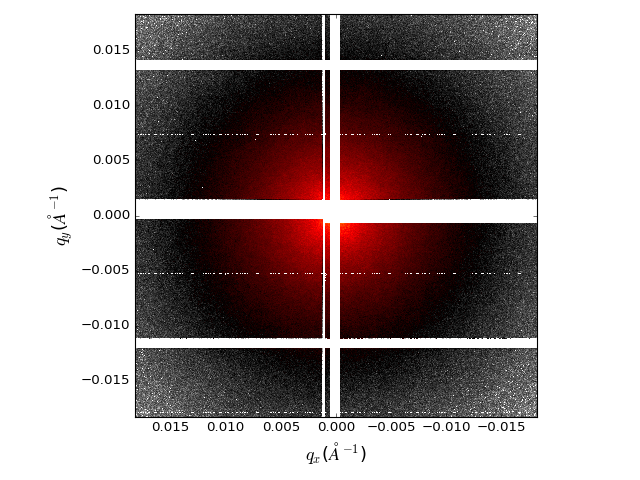

In [60]:
ax = show_saxs_qmap( avg_img, setup_pargs, width=800, show_pixel = False,
      vmin=0.0001, vmax= 1e2, logs=True, show_colorbar=False, save=True, show_time=True,
               save_format='tif',  cmap = cmap_albula, image_name= '', 
               file_name= uidstr + '_avg_qxy' )

# Plot circular average

In [63]:
q_saxs, iq_saxs = total_res[k]['q_saxs'],  total_res[k]['iq_saxs']

<IPython.core.display.Javascript object>


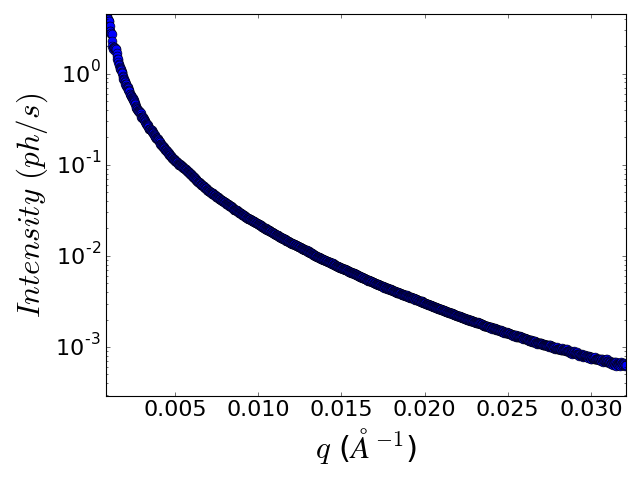

/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [64]:
fig, ax = plt.subplots()
plot1D( x= q_saxs, y = iq_saxs, ax=ax, m='o', c='b', markersize=8, logy= True, title='', legend=None)

ax.set_xlabel(r'$q$' +' ' + r'($\AA^{-1}$)', fontsize=28 )        
ax.set_ylabel(r'$I$' +' ' + r'$(q)$', fontsize=28 )  


plt.setp(ax.get_xticklabels(), rotation=None, fontsize=20)
plt.setp(ax.get_yticklabels(), rotation=None, fontsize=20)
ax.set_xlim(  [ q_saxs.min(), q_saxs.max()*0.9]  )  
ax.set_ylim(   [iq_saxs.min(), iq_saxs.max()]  ) 
ax.set_ylabel(r'$Intensity$ $(ph/s)$')

#ax.grid(color='k', linestyle='--', linewidth=2)
#ax.set_yscale("log", nonposy='clip')

fig.tight_layout()
#fp = path + '%s_q_Iq'%uid  + '.png' 
#fig.savefig( fp, dpi=fig.dpi)
    

# Plot Waterful

In [105]:
md['qth_interest']

KeyError: 'qth_interest'

In [103]:
wat =  total_res[k]['wat']

<IPython.core.display.Javascript object>


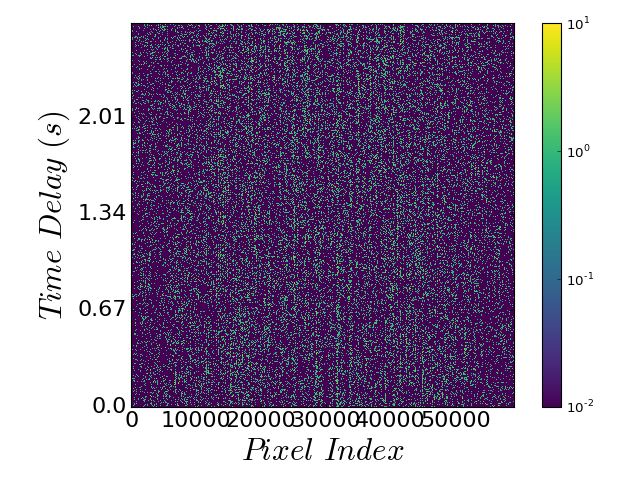

In [77]:
ax =plt.subplots()

#extent= [0, wat.shape[1], 0, wat.shape[0] * timeperframe ]
extent = None
cmap = 'viridis' #cmap_albula
show_img( wat + 1e-16,  ax=ax, vmin=0.01, vmax= 10, logs= True, aspect=wat.shape[1]/wat.shape[0],
         save_format='tif', extent= extent,
         show_colorbar= True, filename='%s_wat'%uidstr,
         image_name= '',  save=True, path=data_dir,  cmap = cmap )

ylabels = [item.get_text() for item in ax[1].get_yticklabels()]
yl =  np.array( ylabels[1:-1], dtype=np.float )
plt.yticks(yl, np.round(yl* timeperframe,2), rotation=None)

xlabels = [item.get_text() for item in ax[1].get_xticklabels()]
xl =  np.array( xlabels[1:-1], dtype=np.int )
plt.xticks(xl, xl, rotation=None)
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    
plt.setp(ax[1].get_xticklabels(), rotation=None, fontsize=20)
plt.setp(ax[1].get_yticklabels(), rotation=None, fontsize=20)

ax[1].set_xlabel(r'$Pixel$' + ' ' + r'$Index$', fontsize=28 )  
ax[1].set_ylabel(r'$Time$' + ' ' + r'$Delay$' + ' ' + r'$ (s)$', fontsize=28 )  
ax[0].tight_layout()

# Plot g2 in one figure

In [85]:
g2 =  total_res[k]['g2']
taus = total_res[k]['taus']
g2_fit_paras = total_res[k]['g2_fit_paras']

In [81]:
num_bufs=8
num_levels = int(np.log( 5000 /(num_bufs-1))/np.log(2) +1) +1
tot_channels, lag_steps, dict_lag = multi_tau_lags(num_levels, num_bufs)
tausf = lag_steps * timeperframe
#print( tausf )   

<IPython.core.display.Javascript object>


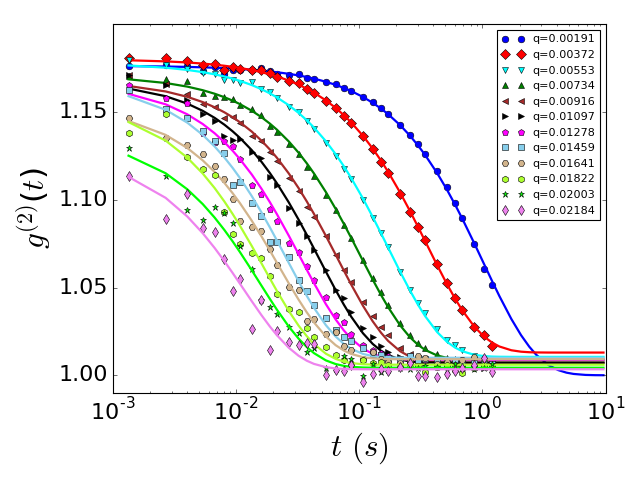

In [87]:
fig,ax=plt.subplots()
 
for i in range(0,12):
    
    y= g2[1:,i]  + i*0.0
    plot1D( x =  taus[1:], y= y, ax=ax, legend= 'q=%s'%qr[i],  ls='', lw=2, 
           m=markers[i], c= colors[i],
           logx=True,   title='', ylim=[1.0,1.2], legend_size= 8 )
    
    rate = g2_fit_paras['relaxation_rate'][i] 
    beta = g2_fit_paras['beta'][i]
    baseline = g2_fit_paras['baseline'][i]
    alpha = g2_fit_paras['alpha'][i]    
    yfit = stretched_auto_corr_scat_factor(tausf[1:], beta, rate, alpha, baseline)
    plot1D( x =  tausf[1:], y= yfit, ax=ax, legend= '',  ls='-', lw=2, 
           m='', c= colors[i],
           logx=True,   title='', ylim=[0.99,1.2], legend_size= 10 ) 
    
#ax.vlines( 0.0132, 0, 10 )    
#ax.vlines( 0.0316, 0, 10 ) 
plt.setp(ax.get_xticklabels(), rotation=None, fontsize=20)
plt.setp(ax.get_yticklabels(), rotation=None, fontsize=20)
ax.set_ylabel( r"$g^{(2)}$" + '(' + r'$t$' + ')', fontsize=28)
#ax.set_xlabel(r"$\tau $ $(s)$", fontsize=16) 
ax.set_xlabel(r"$ t $ $(s)$", fontsize=28) 
fig.tight_layout()

# Plot g1 in one figure

<IPython.core.display.Javascript object>


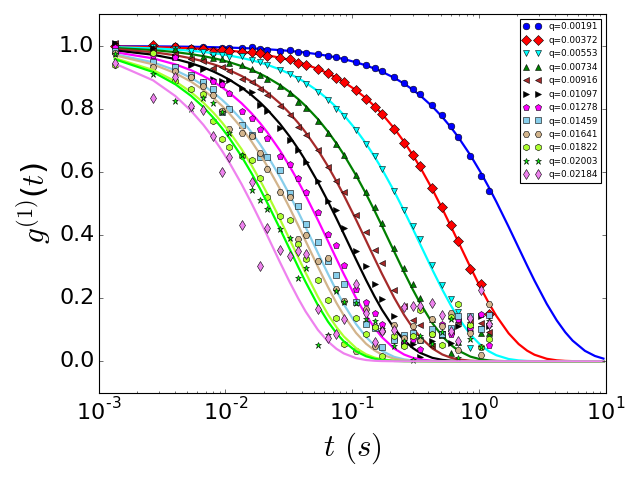

/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [89]:
fig,ax=plt.subplots() 
for i in range(0,12):
    rate = g2_fit_paras['relaxation_rate'][i] 
    beta = g2_fit_paras['beta'][i]
    baseline = g2_fit_paras['baseline'][i]
    alpha = g2_fit_paras['alpha'][i]      
    #yfit = stretched_auto_corr_scat_factor(taus[1:], beta, rate, alpha, baseline)    
    yfit =  np.exp(-1 * ( rate * tausf[1:])**alpha ) 
    
    plot1D( x =  tausf[1:], y= yfit, ax=ax, legend= '',  ls='-', lw=2, 
           m='', c= colors[i],
           logx=True,   title='', ylim=[1.0,1.2], legend_size= 10 ) 
    
    y= np.sqrt( np.abs( (g2[1:,i] -baseline)/beta ) )
    plot1D( x =  taus[1:], y= y, ax=ax, legend= 'q=%s'%qr[i],  ls='', lw=2, 
           m=markers[i], c= colors[i],
           logx=True,   title='', ylim=[-0.1,1.1], legend_size= 8 )
    
    
#ax.vlines( 0.0132, 0, 10 )    
#ax.vlines( 0.0316, 0, 10 ) 
plt.setp(ax.get_xticklabels(), rotation=None, fontsize=20)
plt.setp(ax.get_yticklabels(), rotation=None, fontsize=20)
ax.set_ylabel( r"$g^{(1)}$" + '(' + r'$t$' + ')', fontsize=28)
#ax.set_xlabel(r"$\tau $ $(s)$", fontsize=16) 
ax.set_xlabel(r"$ t $ $(s)$", fontsize=28) 
fig.tight_layout()

# plot rate-q2

In [90]:
fs,fe=0, 12
qval_dict_ = {k:qval_dict[k] for k in list(qval_dict.keys())[fs:fe]  }
D0, qrate_fit_res = get_q_rate_fit_general(  qval_dict_, g2_fit_paras['relaxation_rate'][fs:fe], geometry= scat_geometry )


The fitted diffusion coefficient D0 is:  8.716e+04   A^2S-1


<IPython.core.display.Javascript object>


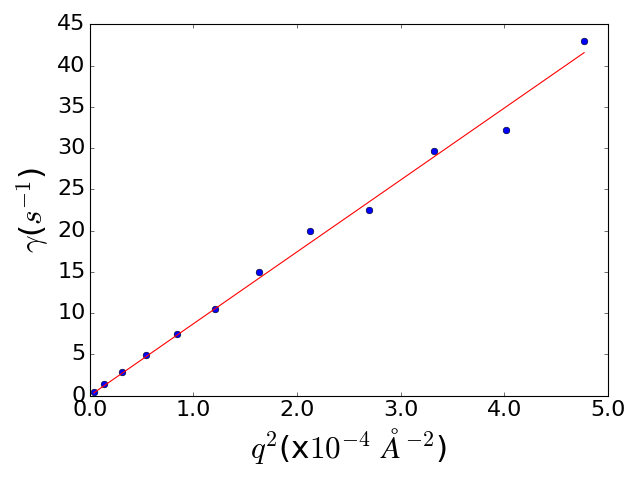

In [91]:
fig, ax = plot_q_rate_fit_general( qval_dict_, g2_fit_paras['relaxation_rate'][fs:fe],  qrate_fit_res, 
            geometry= scat_geometry,uid=uid_  , path= data_dir, show_text=False, return_fig=True )

ax.set_title('') 

xlabels = [item.get_text() for item in ax.get_xticklabels()]
xl =  np.array( xlabels[:], dtype=np.float )
plt.xticks(xl, np.round(xl* 10000,1), rotation=None)


plt.setp(ax.get_xticklabels(), rotation=None, fontsize=20)
plt.setp(ax.get_yticklabels(), rotation=None, fontsize=20)
#ax.xaxis.label.set_size(28)
#ax.yaxis.label.set_size(28)
#ax.set_xlabel(r"$\tau $ $(s)$", fontsize=16) 
#ax.set_yscale('log')
ax.set_ylabel(   r'$\gamma$'"($s^{-1}$)", fontsize=28)
ax.set_xlabel( "$q^2$"   +  r'(' + r'x$10^{-4}$' +' ' + r'$\AA^{-2}$)', fontsize=28)  

fig.tight_layout()

# Plot two-time

In [100]:
g12b =  total_res[k]['g12b']

In [101]:
g12b.shape

(1990, 1990, 16)

<IPython.core.display.Javascript object>


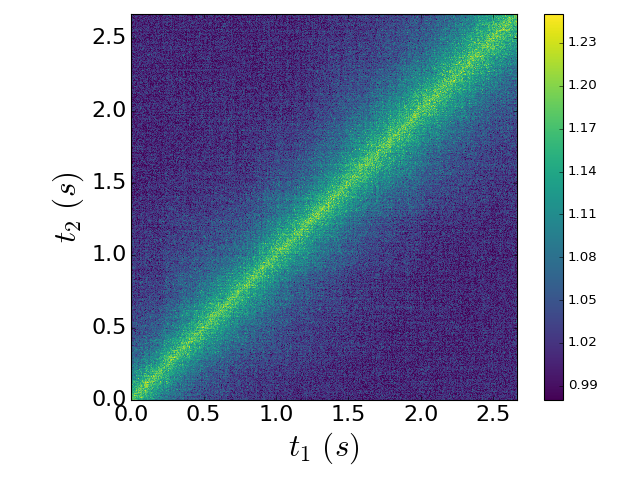

In [119]:
fig, ax, im = show_C12(g12b, q_ind= 1, N1= None, N2= None, vmin= 0.98, vmax=1.25, logs=False,
                       cmap= 'viridis',#cmap_albula,
             timeperframe=timeperframe,save=True, path= data_dir, uid = uid_, return_fig=True )  
ax.set_title('')

plt.setp(ax.get_xticklabels(), rotation=None, fontsize=20)
plt.setp(ax.get_yticklabels(), rotation=None, fontsize=20)

ax.xaxis.label.set_size(28)
ax.yaxis.label.set_size(28)
fig.tight_layout()

# Plot one-time from averaged two-time

In [128]:
g2 =  total_res[k]['g2b']
taus = total_res[k]['tausb']
g2_fit_paras = total_res[k]['g2b_fit_paras']

In [129]:
num_bufs=8
num_levels = int(np.log( 5000 /(num_bufs-1))/np.log(2) +1) +1
tot_channels, lag_steps, dict_lag = multi_tau_lags(num_levels, num_bufs)
tausf = lag_steps * timeperframe
#print( tausf ) 

<IPython.core.display.Javascript object>


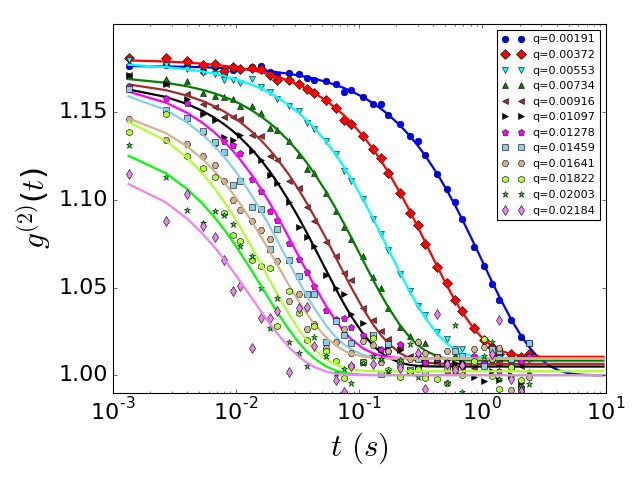

In [124]:
fig,ax=plt.subplots()
 
for i in range(0,12):
    
    y= g2[1:,i]  + i*0.0
    plot1D( x =  taus[1:], y= y, ax=ax, legend= 'q=%s'%qr[i],  ls='', lw=2, 
           m=markers[i], c= colors[i],
           logx=True,   title='', ylim=[1.0,1.2], legend_size= 8 )
    
    rate = g2_fit_paras['relaxation_rate'][i] 
    beta = g2_fit_paras['beta'][i]
    baseline = g2_fit_paras['baseline'][i]
    alpha = g2_fit_paras['alpha'][i]    
    yfit = stretched_auto_corr_scat_factor(tausf[1:], beta, rate, alpha, baseline)
    plot1D( x =  tausf[1:], y= yfit, ax=ax, legend= '',  ls='-', lw=2, 
           m='', c= colors[i],
           logx=True,   title='', ylim=[0.99,1.2], legend_size= 10 ) 
    
#ax.vlines( 0.0132, 0, 10 )    
#ax.vlines( 0.0316, 0, 10 ) 
plt.setp(ax.get_xticklabels(), rotation=None, fontsize=20)
plt.setp(ax.get_yticklabels(), rotation=None, fontsize=20)
ax.set_ylabel( r"$g^{(2)}$" + '(' + r'$t$' + ')', fontsize=28)
#ax.set_xlabel(r"$\tau $ $(s)$", fontsize=16) 
ax.set_xlabel(r"$ t $ $(s)$", fontsize=28) 
fig.tight_layout()

<IPython.core.display.Javascript object>


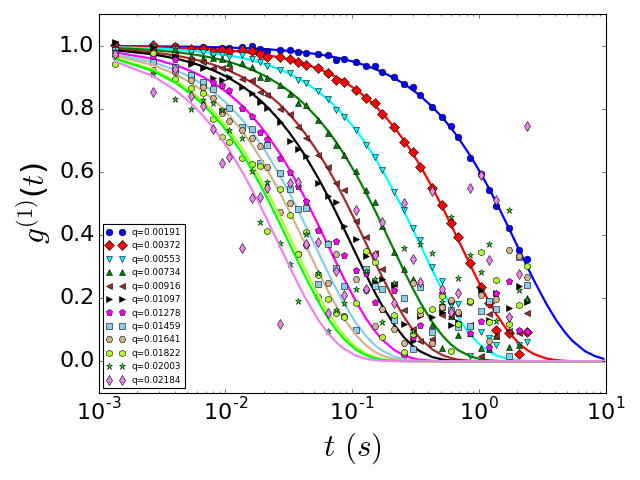

/opt/conda_envs/analysis/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [125]:
fig,ax=plt.subplots() 
for i in range(0,12):
    rate = g2_fit_paras['relaxation_rate'][i] 
    beta = g2_fit_paras['beta'][i]
    baseline = g2_fit_paras['baseline'][i]
    alpha = g2_fit_paras['alpha'][i]      
    #yfit = stretched_auto_corr_scat_factor(taus[1:], beta, rate, alpha, baseline)    
    yfit =  np.exp(-1 * ( rate * tausf[1:])**alpha ) 
    
    plot1D( x =  tausf[1:], y= yfit, ax=ax, legend= '',  ls='-', lw=2, 
           m='', c= colors[i],
           logx=True,   title='', ylim=[1.0,1.2], legend_size= 10 ) 
    
    y= np.sqrt( np.abs( (g2[1:,i] -baseline)/beta ) )
    plot1D( x =  taus[1:], y= y, ax=ax, legend= 'q=%s'%qr[i],  ls='', lw=2, 
           m=markers[i], c= colors[i],
           logx=True,   title='', ylim=[-0.1,1.1], legend_size= 8 )
    
    
#ax.vlines( 0.0132, 0, 10 )    
#ax.vlines( 0.0316, 0, 10 ) 
plt.setp(ax.get_xticklabels(), rotation=None, fontsize=20)
plt.setp(ax.get_yticklabels(), rotation=None, fontsize=20)
ax.set_ylabel( r"$g^{(1)}$" + '(' + r'$t$' + ')', fontsize=28)
#ax.set_xlabel(r"$\tau $ $(s)$", fontsize=16) 
ax.set_xlabel(r"$ t $ $(s)$", fontsize=28) 
fig.tight_layout()

In [130]:
fs,fe=0, 12
qval_dict_ = {k:qval_dict[k] for k in list(qval_dict.keys())[fs:fe]  }
D0, qrate_fit_res = get_q_rate_fit_general(  qval_dict_, g2_fit_paras['relaxation_rate'][fs:fe], geometry= scat_geometry )


The fitted diffusion coefficient D0 is:  8.244e+04   A^2S-1


<IPython.core.display.Javascript object>


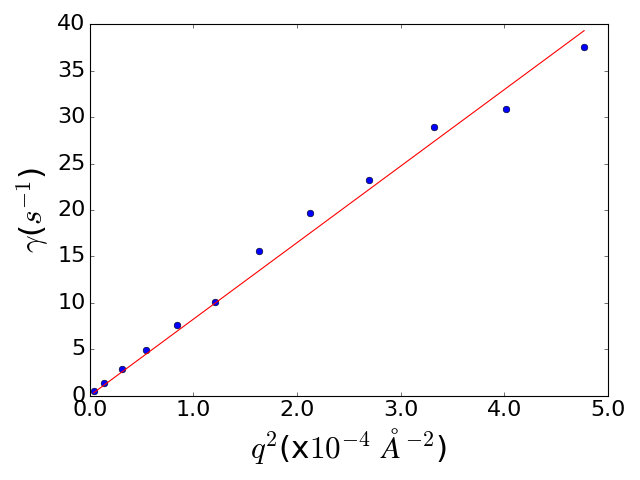

In [127]:
fig, ax = plot_q_rate_fit_general( qval_dict_, g2_fit_paras['relaxation_rate'][fs:fe],  qrate_fit_res, 
            geometry= scat_geometry,uid=uid_  , path= data_dir, show_text=False, return_fig=True )

ax.set_title('') 

xlabels = [item.get_text() for item in ax.get_xticklabels()]
xl =  np.array( xlabels[:], dtype=np.float )
plt.xticks(xl, np.round(xl* 10000,1), rotation=None)


plt.setp(ax.get_xticklabels(), rotation=None, fontsize=20)
plt.setp(ax.get_yticklabels(), rotation=None, fontsize=20)
#ax.xaxis.label.set_size(28)
#ax.yaxis.label.set_size(28)
#ax.set_xlabel(r"$\tau $ $(s)$", fontsize=16) 
#ax.set_yscale('log')
ax.set_ylabel(   r'$\gamma$'"($s^{-1}$)", fontsize=28)
ax.set_xlabel( "$q^2$"   +  r'(' + r'x$10^{-4}$' +' ' + r'$\AA^{-2}$)', fontsize=28)  

fig.tight_layout()